In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def load_data(file_name):
  df = pd.read_csv(file_name, sep=',',  index_col=False)
  df.columns = ['housesize','rooms', 'price']
  data = np.array(df, dtype=float)
  plot_data(data[:, :2], data[:, -1])
  normalize(data)
  return data[:, :2], data[:, -1]

In [27]:
def normalize(data):
  for i in range(0, data.shape[1]-1):
    data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, -i])

    mu.append(np.mean(data[:, i]))
    std.append(np.std(data[:, i]))

In [18]:
def plot_data(x, y):
  plt.plot(x[:, 0], y, 'bo')
  plt.xlabel('House size')
  plt.ylabel('Price')
  plt.title('Plot of Data')
  plt.show()

In [9]:
def h(x, theta):
  return np.matmul(x, theta)

Cost function


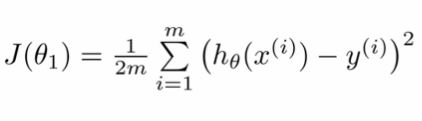

In [10]:
def cost_function(x, y, theta):
  return ((h(x, theta) - y).T@(h(x, theta) - y)) / (2*y.shape[0])

Gradient Descent

![gradient_descent](https://miro.medium.com/max/576/0*2D8fvpZJqoFYGDH2.png)

In [11]:
def gradient_descent(x, y, theta, learning_rate = 0.1, epochs = 10):
  m = y.shape[0]
  J_all = []

  for _ in range(epochs):
    h_theta = h(x, theta)
    cost_ = (1/m) * (x.T@(h_theta - y))
    theta = theta - (learning_rate*cost_)
    J_all.append(cost_function(x, y, theta))
  
  return theta, J_all

In [22]:
def plot_cost(J_all, num_epochs):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Plot of Cost')
  plt.plot(num_epochs, J_all, 'm', linewidth = '5')
  plt.show()

In [23]:
def test(theta, x):
  x[0] = (x[0] - mu[0])/std[0]
  x[1] = (x[1] - mu[1])/std[1]

  y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
  print('Price of house: ', y)

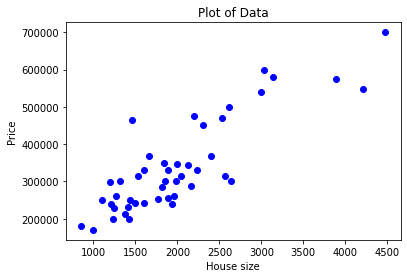

Cost:  [[2.08146352e+09]]
Parameters:  [[3.37371711e+05]
 [1.06205625e+05]
 [2.33256646e-01]]


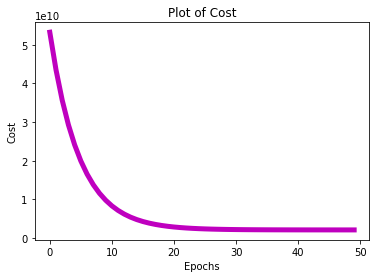

Price of house:  [1.70342876e+08]


In [28]:
mu, std = [], []

x, y = load_data('/content/house_price_data.txt')
y = np.reshape(y, (46, 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
epochs = 50

theta, J_all = gradient_descent(x, y, theta, learning_rate=learning_rate, epochs=epochs)
J = cost_function(x, y, theta)
print('Cost: ', J)
print('Parameters: ', theta)

n_epochs = []
jplot = []
count = 0
for i in J_all:
  jplot.append(i[0][0])
  n_epochs.append(count)
  count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 2])